In [1]:
import seaborn as sns

In [171]:
## Step 1 - survey data and maske binning decision
## Step 2 - ask questions without looking at data
## Step 3 - figure out what comparisons or relationships you want to explore with target variable (max three per feature)
## Step 4 - figure out how you want features to relate to each other (max four visuals per feaature)
## Step 5 - keep lis?t to track inquiries

In [3]:
### below is the most important code

In [4]:
sns.plotting_context()

{'font.size': 10.0,
 'axes.labelsize': 'medium',
 'axes.titlesize': 'large',
 'xtick.labelsize': 'medium',
 'ytick.labelsize': 'medium',
 'legend.fontsize': 'medium',
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0}

In [5]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'patch.force_edgecolor': False,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [6]:
seed = 14

In [7]:
# magic
%matplotlib inline

# warnings
import warnings
warnings.filterwarnings(action='ignore')

# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

# other libraries
import pydotplus
from numpy import loadtxt
from xgboost import XGBClassifier
from IPython.display import Image  
from imblearn.ensemble import BalancedRandomForestClassifier 
from imblearn.datasets import make_imbalance
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# sci-kit learn libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.feature_selection import rfe
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.externals.six import StringIO  

Using TensorFlow backend.


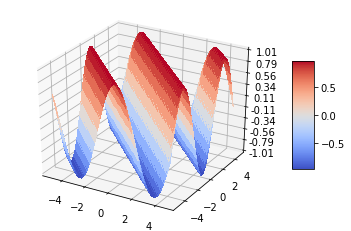

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = X+Y
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [9]:
df = pd.read_csv('hotel_bookings.csv')

In [10]:
print(df.shape)
df.head()

(119390, 32)


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.drop('company',axis=1,inplace=True)

In [13]:
df.agent.fillna((df.agent.mean()+df.agent.median())/2,inplace=True)

In [14]:
df.children.fillna((df.children.mean()+df.children.median())/2,inplace=True)

In [15]:
df.country.fillna('PRT',inplace=True)

In [16]:
month_dict = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,
             'October':10,'November':11,'December':12}

In [17]:
df.arrival_date_month=df.arrival_date_month.map(lambda x: month_dict[x])

In [18]:
df['got_correct_room'] = df.reserved_room_type==df.assigned_room_type

df['total_guests']=0
df['total_nights']=0

for i in range(len(df)):
    df['total_guests'].iloc[i] = np.sum([df['adults'].iloc[i],df['children'].iloc[i],df['babies'].iloc[i]])
    df['total_nights'].iloc[i] = np.sum([df['stays_in_week_nights'].iloc[i],df['stays_in_weekend_nights'].iloc[i]])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 34 columns):
hotel                             87396 non-null object
is_canceled                       87396 non-null int64
lead_time                         87396 non-null int64
arrival_date_year                 87396 non-null int64
arrival_date_month                87396 non-null int64
arrival_date_week_number          87396 non-null int64
arrival_date_day_of_month         87396 non-null int64
stays_in_weekend_nights           87396 non-null int64
stays_in_week_nights              87396 non-null int64
adults                            87396 non-null int64
children                          87396 non-null float64
babies                            87396 non-null int64
meal                              87396 non-null object
country                           87396 non-null object
market_segment                    87396 non-null object
distribution_channel              87396 non-null object
is_

In [20]:
for col in df.columns:
    if df[col].nunique() > 10 and (df[col].dtype == float or df[col].dtype == int):
        df[f'{col}_bin'] = pd.cut(df[col],bins=3)

In [21]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'got_correct_room',
       'total_guests', 'total_nights', 'lead_time_bin',
       'arrival_date_month_bin', 'arrival_date_week_number_bin',
       'arrival_date_day_of_month_bin', 'stays_in_weekend_nights_bin',
       'stays_in_week_nights_bin', 'adults_bin', 'previous_cancellations_bin',
       'previous_bookings

In [22]:
# hotel, children, babies, distribtution channel, is_repeated_guest, deposit_type, customer_type, reservation_status, got_correct_room

In [23]:
for col in df.columns:
    print(col,df[col].nunique())

hotel 2
is_canceled 2
lead_time 479
arrival_date_year 3
arrival_date_month 12
arrival_date_week_number 53
arrival_date_day_of_month 31
stays_in_weekend_nights 17
stays_in_week_nights 35
adults 14
children 6
babies 5
meal 5
country 177
market_segment 8
distribution_channel 5
is_repeated_guest 2
previous_cancellations 15
previous_bookings_not_canceled 73
reserved_room_type 10
assigned_room_type 12
booking_changes 21
deposit_type 3
agent 334
days_in_waiting_list 128
customer_type 4
adr 8879
required_car_parking_spaces 5
total_of_special_requests 6
reservation_status 3
reservation_status_date 926
got_correct_room 2
total_guests 17
total_nights 45
lead_time_bin 3
arrival_date_month_bin 3
arrival_date_week_number_bin 3
arrival_date_day_of_month_bin 3
stays_in_weekend_nights_bin 3
stays_in_week_nights_bin 3
adults_bin 3
previous_cancellations_bin 3
previous_bookings_not_canceled_bin 3
booking_changes_bin 3
agent_bin 3
days_in_waiting_list_bin 3
adr_bin 2
total_guests_bin 3
total_nights_bin 3


In [24]:
## is_repeated, dsitribution_channel, market_segment, meal

## EDA with target variable

In [25]:
df[['hotel','is_canceled','customer_type']].groupby(['customer_type','hotel'],as_index=False).describe()

is_canceled                                             
        count      mean       std  min  25%  50%  75%  max
0      1471.0  0.250170  0.433258  0.0  0.0  0.0  0.5  1.0
1      1668.0  0.086331  0.280936  0.0  0.0  0.0  0.0  1.0
2       271.0  0.088561  0.284635  0.0  0.0  0.0  0.0  1.0
3       273.0  0.109890  0.313327  0.0  0.0  0.0  0.0  1.0
4     44641.0  0.324231  0.468092  0.0  0.0  0.0  1.0  1.0
5     27345.0  0.263229  0.440394  0.0  0.0  0.0  1.0  1.0
6      7045.0  0.167921  0.373822  0.0  0.0  0.0  0.0  1.0
7      4682.0  0.129005  0.335241  0.0  0.0  0.0  0.0  1.0

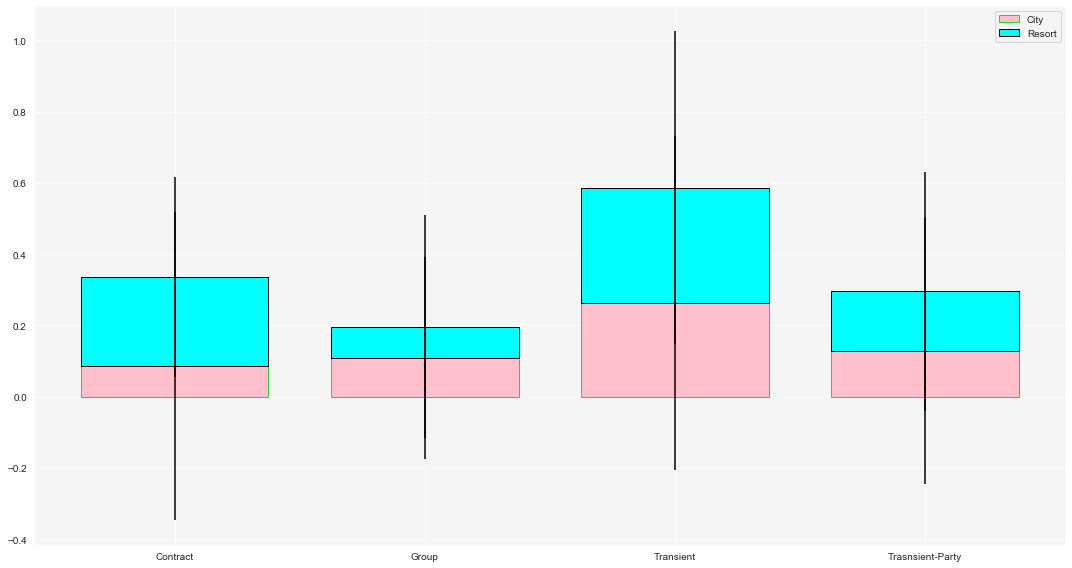

In [26]:
with sns.axes_style('darkgrid',{'axes.facecolor': 'whitesmoke'}):

    labels_1 = ['Contract', 'Group', 'Transient', 'Trasnsient-Party']
    city_means = [0.25, 0.088, 0.324, 0.167]
    resort_means = [0.086, 0.109, 0.263, 0.129]
    city_std = [0.433, 0.284, 0.468, 0.373]
    resort_std = [0.28, 0.313, 0.44, 0.335]

    plt.figure(figsize=(15,8))

    width = 0.75
    plt.bar(labels_1, resort_means, width, yerr=city_std, label='City',color='pink',edgecolor='limegreen')
    plt.bar(labels_1, city_means, width, yerr=resort_std, bottom=resort_means,label='Resort',color='aqua',edgecolor='black')
    plt.legend()
    plt.tight_layout()

    plt.show()

In [27]:
df[['hotel','is_canceled','is_repeated_guest']].groupby(['is_repeated_guest','hotel'],as_index=False).mean()

is_repeated_guest         hotel  is_canceled
0                  0    City Hotel     0.306651
1                  0  Resort Hotel     0.245002
2                  1    City Hotel     0.110656
3                  1  Resort Hotel     0.042179

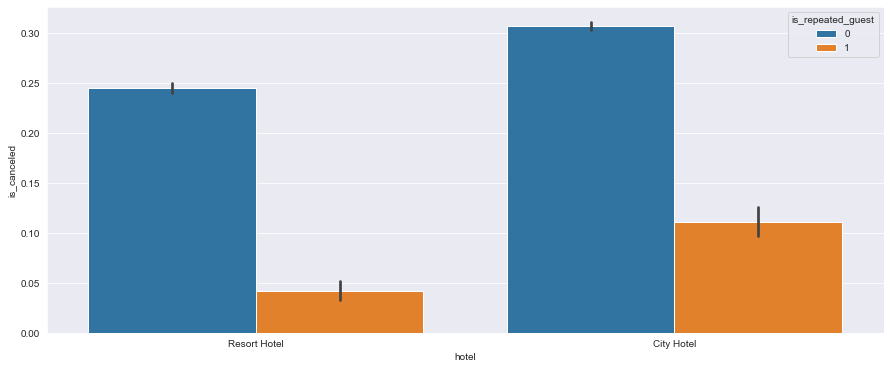

In [28]:
with sns.plotting_context("paper") and sns.axes_style('darkgrid'):    
    plt.figure(figsize=(15,6))
    sns.barplot(df['hotel'],df['is_canceled'],hue=df['is_repeated_guest'])
    plt.show()

In [29]:
hotel_cancel_market =df[['hotel','is_canceled','market_segment']].groupby(['hotel','market_segment'],as_index=False).mean()

In [30]:
hotel_cancel_market[hotel_cancel_market.hotel=='City Hotel']

hotel market_segment  is_canceled
0  City Hotel       Aviation     0.198238
1  City Hotel  Complementary     0.111111
2  City Hotel      Corporate     0.118545
3  City Hotel         Direct     0.164058
4  City Hotel         Groups     0.337761
5  City Hotel  Offline TA/TO     0.173429
6  City Hotel      Online TA     0.360576
7  City Hotel      Undefined     1.000000

In [31]:
list(hotel_cancel_market[hotel_cancel_market.hotel=='City Hotel'].iloc[:,2].values)

[0.19823788546255505,
 0.1111111111111111,
 0.11854512797485406,
 0.1640582838640043,
 0.3377609108159393,
 0.173428689313712,
 0.3605760987597874,
 1.0]

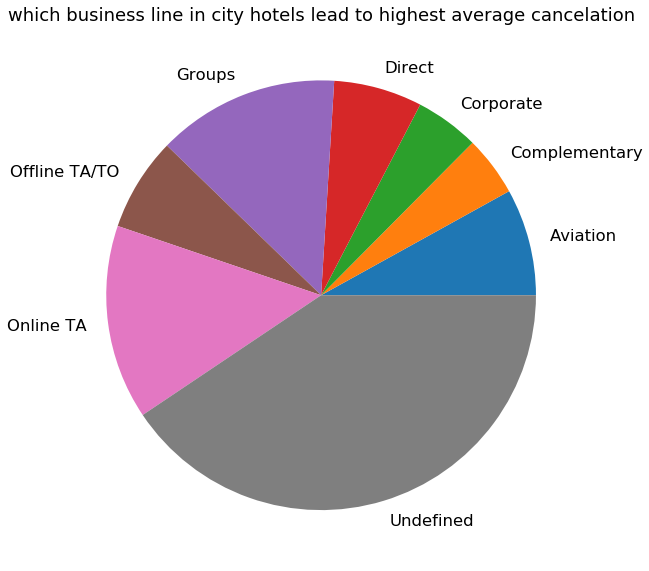

In [32]:
with sns.plotting_context("talk"):    
    plt.figure(figsize=(15,8))
    plt.pie(list(hotel_cancel_market[hotel_cancel_market.hotel=='City Hotel'].iloc[:,2].values),
            labels=list(hotel_cancel_market[hotel_cancel_market.hotel=='City Hotel'].iloc[:,1].values))
    plt.tight_layout()
    plt.title('which business line in city hotels lead to highest average cancelation')
    plt.show()

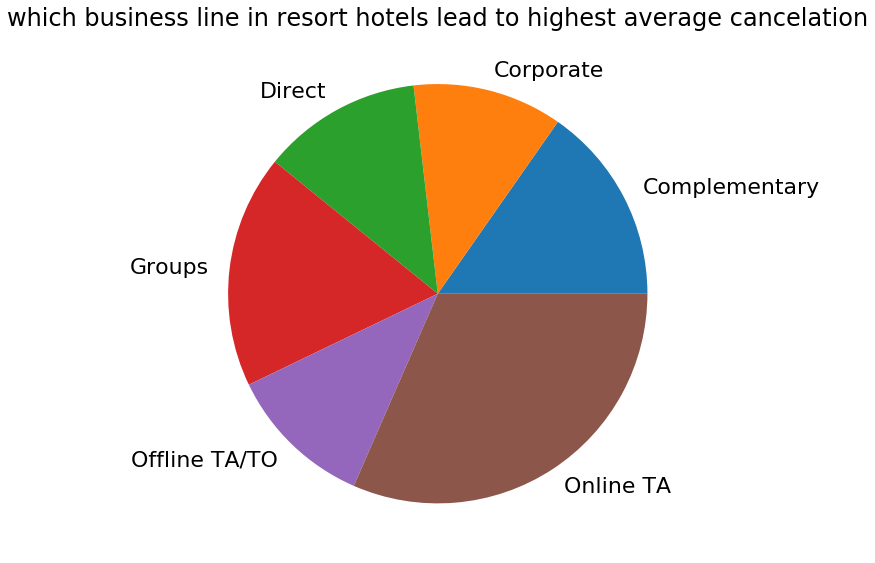

In [33]:
with sns.plotting_context("poster"):        
    plt.figure(figsize=(15,8))
    plt.pie(list(hotel_cancel_market[hotel_cancel_market.hotel=='Resort Hotel'].iloc[:,2].values),
            labels=list(hotel_cancel_market[hotel_cancel_market.hotel=='Resort Hotel'].iloc[:,1].values),
           shadow=False)
    plt.tight_layout()
    plt.title('which business line in resort hotels lead to highest average cancelation')
    plt.show()

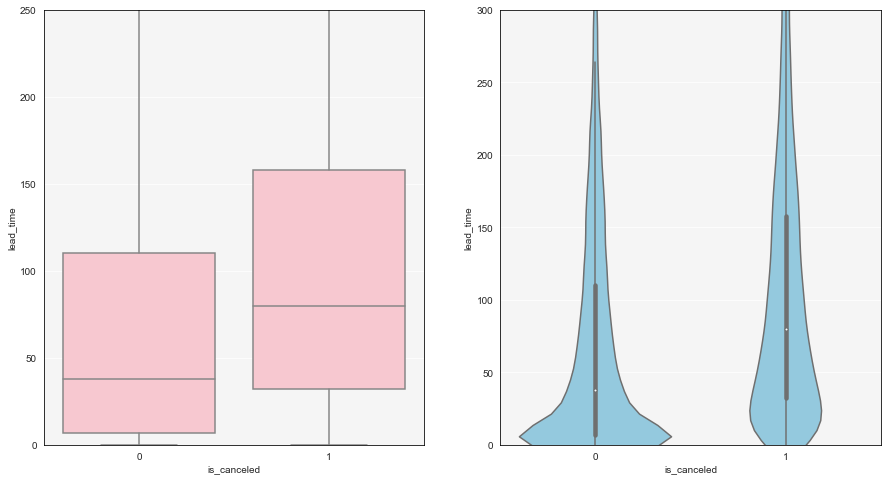

In [34]:
with sns.plotting_context("poster") and sns.axes_style('darkgrid',{'axes.facecolor': 'whitesmoke','axes.edgecolor': 'k'}):    

    plt.figure(figsize=(15,8))

    plt.subplot(1,2,1)
    sns.boxplot(x=df['is_canceled'],y=df['lead_time'],color='pink')
    plt.ylim(0,250)

    plt.subplot(1,2,2)
    sns.violinplot(x=df['is_canceled'],y=df['lead_time'],color='skyblue')
    plt.ylim(0,300)

    plt.show()

In [35]:
lead_cancel = df[['is_canceled','lead_time']].groupby('lead_time',as_index=False).mean()

In [36]:
df[['is_canceled','lead_time_bin','customer_type']].groupby(['customer_type','lead_time_bin'],as_index=False).mean()

customer_type       lead_time_bin  is_canceled
0          Contract   (-0.737, 245.667]     0.153117
1          Contract  (245.667, 491.333]     0.232911
2          Contract    (491.333, 737.0]     0.000000
3             Group   (-0.737, 245.667]     0.072692
4             Group  (245.667, 491.333]     0.485714
5             Group    (491.333, 737.0]          NaN
6         Transient   (-0.737, 245.667]     0.288984
7         Transient  (245.667, 491.333]     0.576778
8         Transient    (491.333, 737.0]     0.957447
9   Transient-Party   (-0.737, 245.667]     0.142293
10  Transient-Party  (245.667, 491.333]     0.218310
11  Transient-Party    (491.333, 737.0]     0.129032

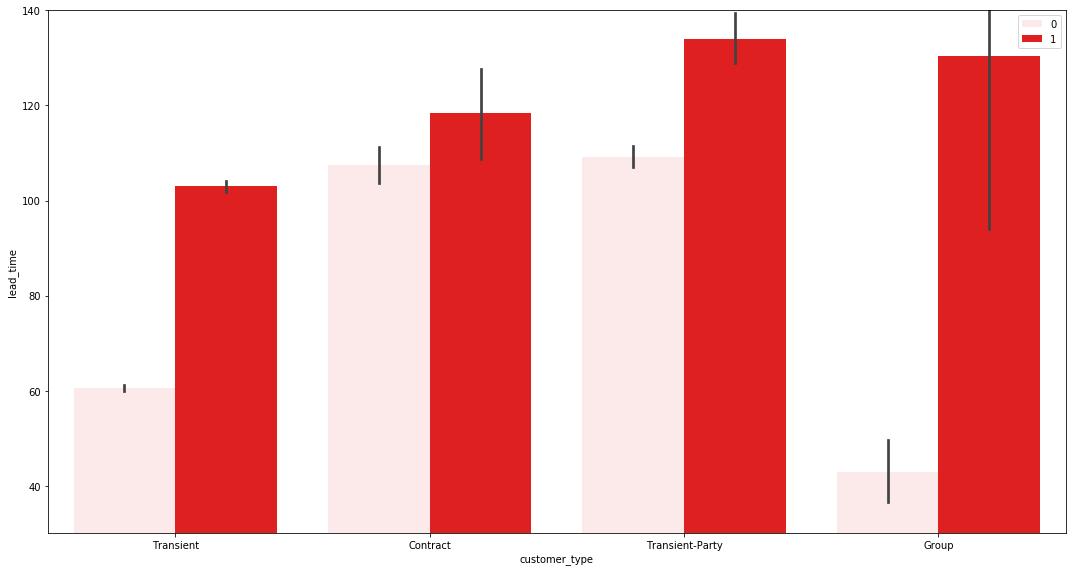

In [37]:
plt.figure(figsize=(15,8))

plt.subplot(1,1,1)
sns.barplot(df['customer_type'],df['lead_time'],hue=df['is_canceled'],color='r')
plt.legend()
plt.tight_layout()
plt.ylim(30,140)

plt.show()

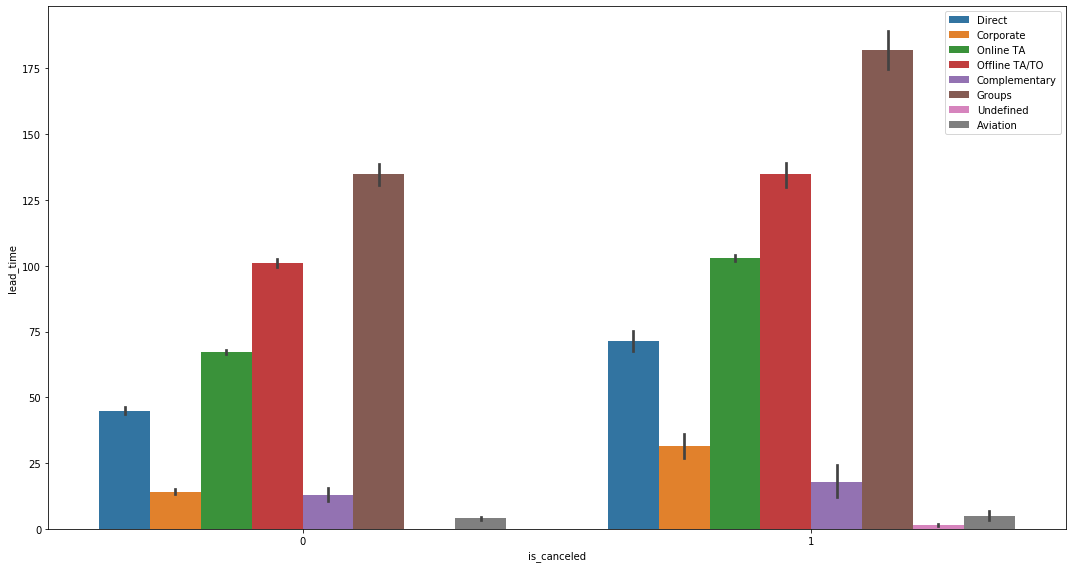

In [38]:
plt.figure(figsize=(15,8))

plt.subplot(1,1,1)
sns.barplot(df['is_canceled'],df['lead_time'],hue=df['market_segment'])
plt.legend(loc='best')
plt.tight_layout()

plt.show()

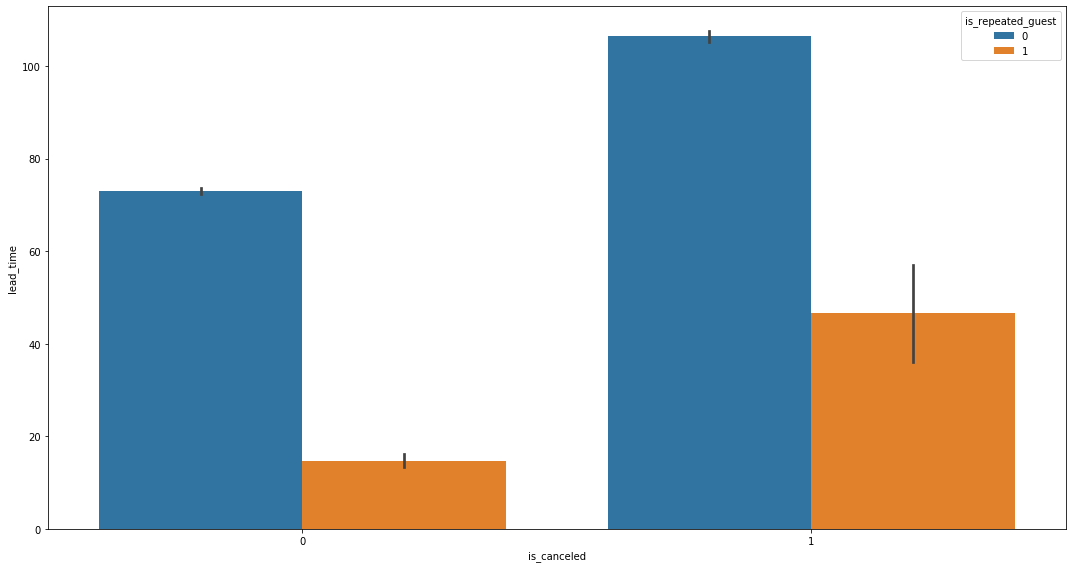

In [39]:
plt.figure(figsize=(15,8))

plt.subplot(1,1,1)
sns.barplot(df['is_canceled'],df['lead_time'],hue=df['is_repeated_guest'])
plt.tight_layout()

plt.show()

In [40]:
df[['is_canceled','lead_time_bin','customer_type']].groupby(['customer_type','lead_time_bin'],as_index=False).mean()

customer_type       lead_time_bin  is_canceled
0          Contract   (-0.737, 245.667]     0.153117
1          Contract  (245.667, 491.333]     0.232911
2          Contract    (491.333, 737.0]     0.000000
3             Group   (-0.737, 245.667]     0.072692
4             Group  (245.667, 491.333]     0.485714
5             Group    (491.333, 737.0]          NaN
6         Transient   (-0.737, 245.667]     0.288984
7         Transient  (245.667, 491.333]     0.576778
8         Transient    (491.333, 737.0]     0.957447
9   Transient-Party   (-0.737, 245.667]     0.142293
10  Transient-Party  (245.667, 491.333]     0.218310
11  Transient-Party    (491.333, 737.0]     0.129032

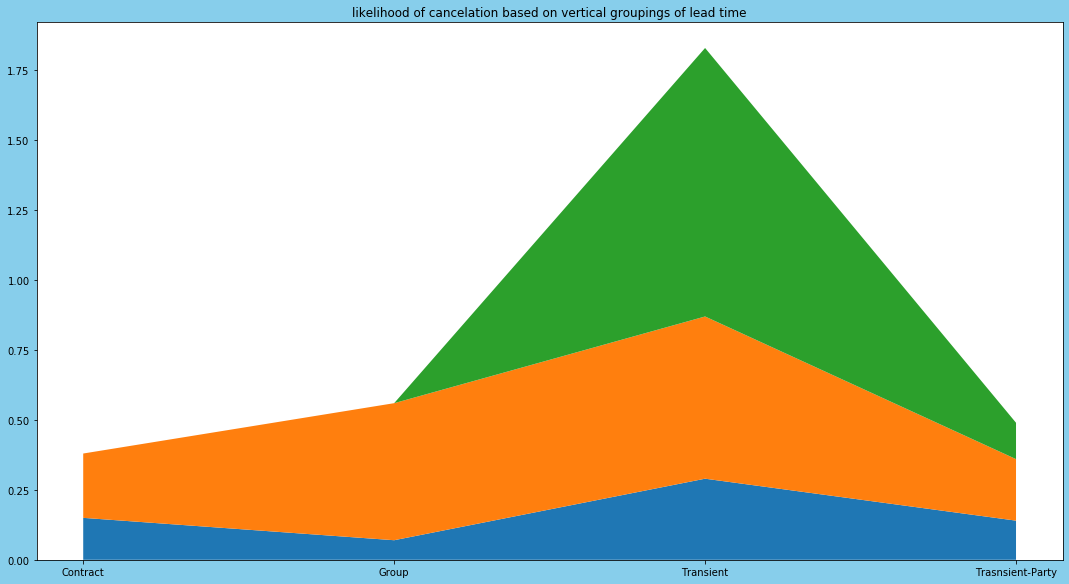

In [41]:
labels_2 = ['Contract', 'Group', 'Transient', 'Trasnsient-Party']
x = labels_2
low_lead = [0.15,0.07,0.29,0.14]
mid_lead = [0.23,0.49,0.58,0.22]
high_lead = [0,0,0.96,0.13]
y = [low_lead,mid_lead,high_lead]

plt.figure(figsize=(15,8),facecolor='skyblue',edgecolor='red')

width = 0.5
plt.stackplot(x,y)
plt.tight_layout()
plt.title('likelihood of cancelation based on vertical groupings of lead time',color='black')

plt.title

plt.show()

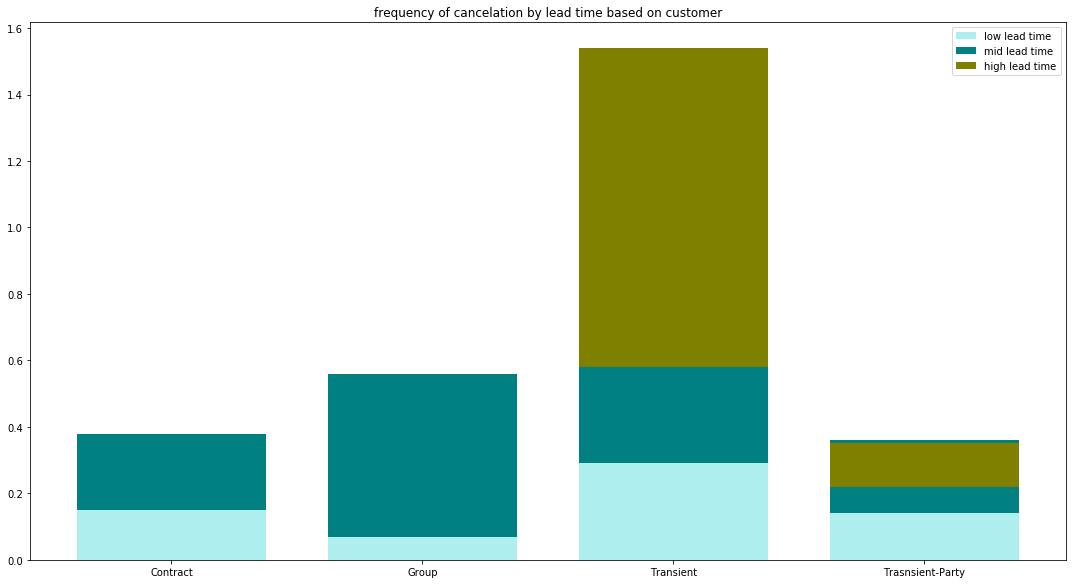

In [42]:
plt.figure(figsize=(15,8))

width = 0.75
plt.bar(labels_2, low_lead, width, label='low lead time', color='paleturquoise')
plt.bar(labels_2, mid_lead, width, bottom=low_lead,label='mid lead time',color='teal')
plt.bar(labels_2, high_lead, width, bottom=mid_lead,label='high lead time',color='olive')
plt.legend()
plt.tight_layout()
plt.title('frequency of cancelation by lead time based on customer')

plt.show()

<Figure size 1080x576 with 0 Axes>

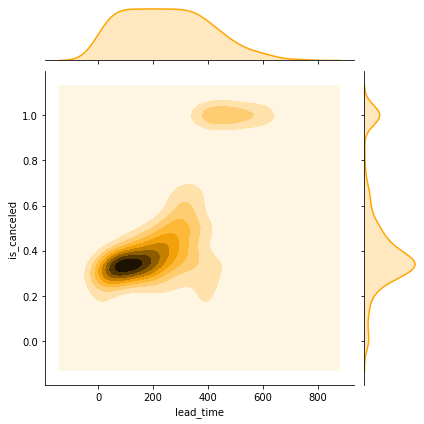

In [43]:
plt.figure(figsize=(15,8))

sns.jointplot(lead_cancel['lead_time'],lead_cancel['is_canceled'],kind='kde',color='orange')

plt.show()

In [44]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(lead_cancel['lead_time'],lead_cancel['is_canceled'],color='sienna')

plt.subplot(1,2,2)
sns.regplot(lead_cancel['lead_time'],lead_cancel['is_canceled'],color='plum')

plt.show()

In [45]:
with sns.axes_style({'axes.facecolor': 'silver'}):

    plt.figure(figsize=(15,8))

    sns.catplot(x='is_canceled',y='lead_time',hue='customer_type',data = df)
    plt.ylim(400,600)

    plt.show()

<Figure size 1080x576 with 0 Axes>

In [46]:
a_y_m = df[['arrival_date_year','is_canceled']].groupby(['arrival_date_year']).mean()

In [47]:
a_y_m.plot(kind='bar',figsize=(15,8),color='limegreen')
plt.ylim(0.19)
plt.show()

In [48]:
a_y_mm = df[['arrival_date_month','is_canceled']].groupby(['arrival_date_month']).mean()

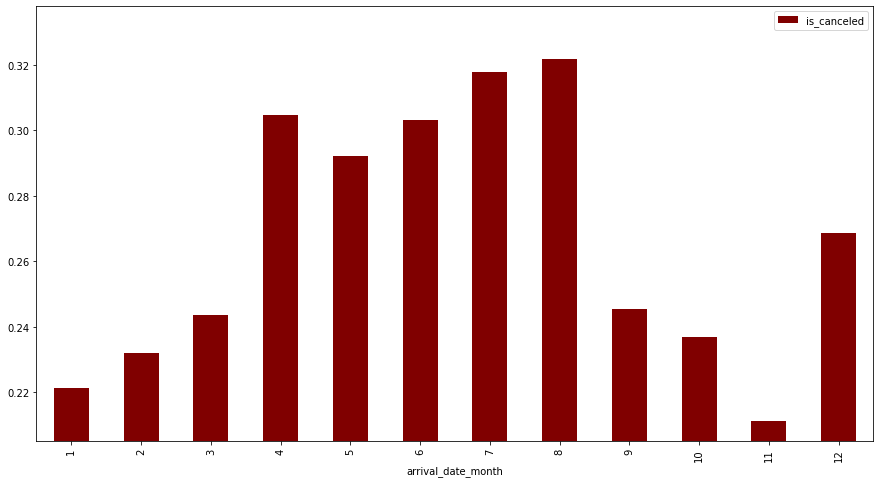

In [49]:
a_y_mm.plot(kind='bar',figsize=(15,8),color='maroon')
plt.ylim(0.205)
plt.show()

In [50]:
a_y_w = df[['arrival_date_week_number','is_canceled']].groupby(['arrival_date_week_number']).mean()

In [51]:
a_y_w.plot(figsize=(15,8),color='c')
plt.show()

In [52]:
(df[['arrival_date_day_of_month','is_canceled']].groupby(['arrival_date_day_of_month']).mean())

is_canceled
arrival_date_day_of_month             
1                             0.295668
2                             0.267905
3                             0.281228
4                             0.272046
5                             0.266779
6                             0.258111
7                             0.281435
8                             0.288715
9                             0.260250
10                            0.263555
11                            0.275815
12                            0.261523
13                            0.268848
14                            0.271816
15                            0.274660
16                            0.281514
17                            0.289735
18                            0.267784
19                            0.254323
20                            0.262093
21                            0.266383
22                            0.289504
23                            0.259366
24                            0.284685
25                            0.262156
26                            0.295667
27                            0.292557
28                            0.287470
29                            0.291667
30                            0.284632
31                            0.258511

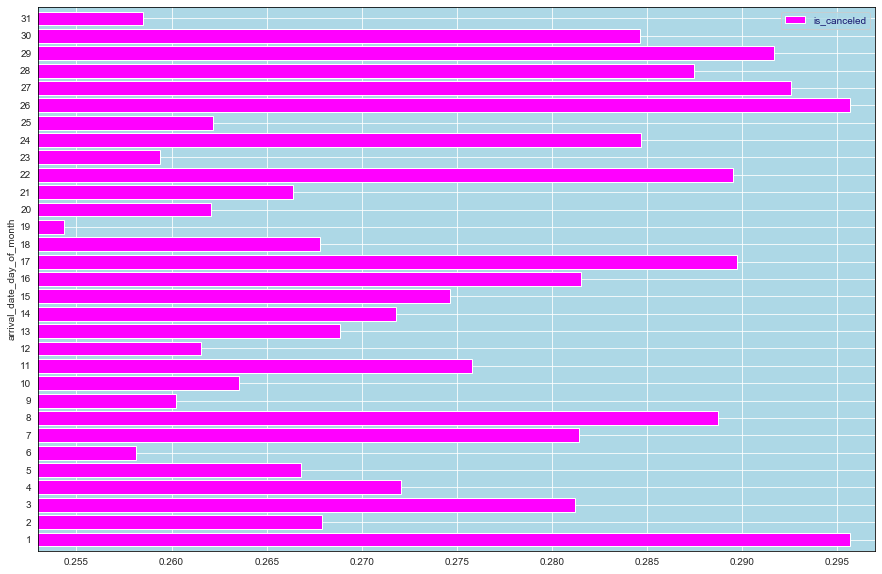

<Figure size 432x288 with 0 Axes>

In [53]:
with sns.plotting_context("poster") and sns.axes_style('darkgrid',
                        {'axes.facecolor': 'lightblue','axes.edgecolor': 'black','text.color':'midnightblue'}):    
    ((df[['arrival_date_day_of_month','is_canceled']].groupby(['arrival_date_day_of_month']).mean())).plot(kind='barh',figsize=(15,10),color='fuchsia',width=0.8)
    plt.xlim(0.253,0.297)
    plt.show()
    plt.tight_layout()

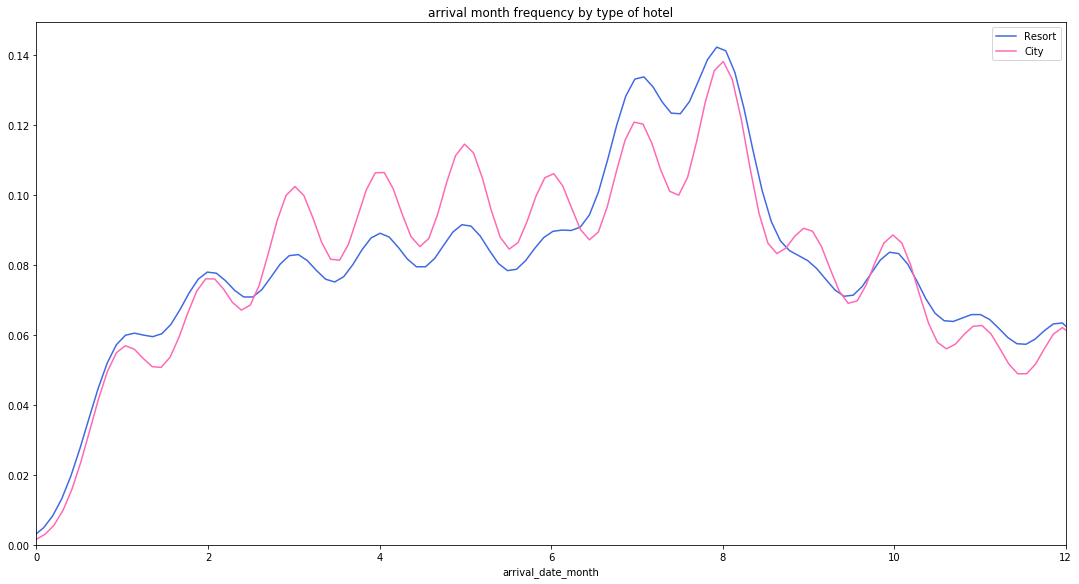

In [54]:
plt.figure(figsize=(15,8))
sns.distplot((df[df.hotel=='Resort Hotel'])['arrival_date_month'],hist=False, color = 'royalblue',label='Resort')
sns.distplot((df[df.hotel=='City Hotel'])['arrival_date_month'],hist=False,color = 'hotpink',label='City')
plt.tight_layout()
plt.xlim(0,12)
plt.title('arrival month frequency by type of hotel')
plt.show()

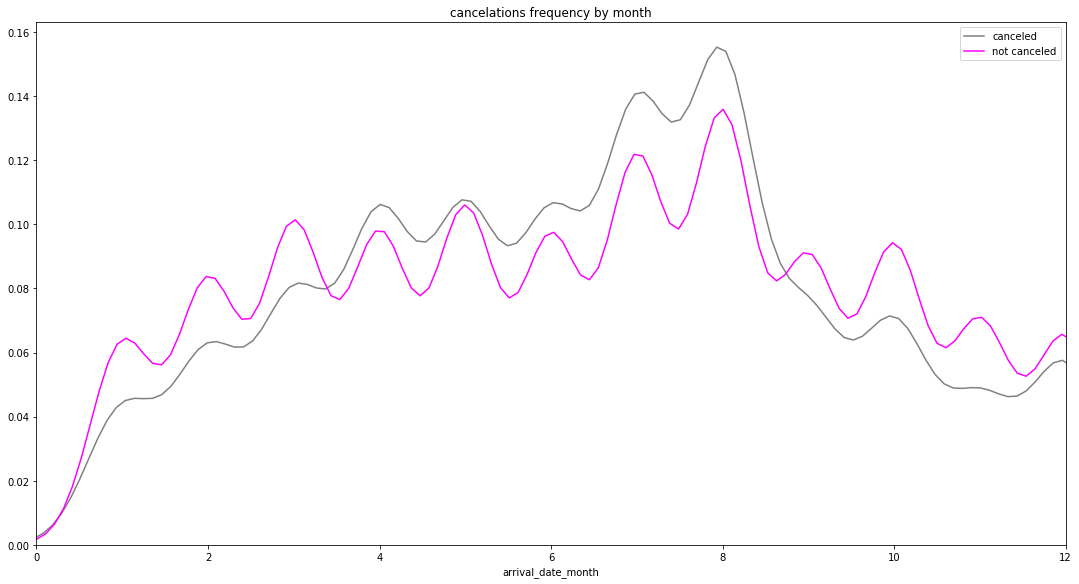

In [55]:
plt.figure(figsize=(15,8))
sns.distplot((df[df.is_canceled==True])['arrival_date_month'],hist=False, color = 'gray',label='canceled')
sns.distplot((df[df.is_canceled==False])['arrival_date_month'],hist=False,color = 'magenta',label='not canceled')
plt.tight_layout()
plt.xlim(0,12)
plt.title('cancelations frequency by month')
plt.show()

In [56]:
plt.figure(figsize=(15,8))

plt.subplot(1,1,1)
sns.barplot(df['arrival_date_day_of_month'],df['customer_type'],hue=df['is_canceled'],color='tomato')
plt.tight_layout()
plt.xlim(14.5,16.25)

plt.show()

In [57]:
stays_hotel = df[['stays_in_weekend_nights','is_canceled','hotel']].groupby(['hotel','stays_in_weekend_nights'],as_index=False).mean()

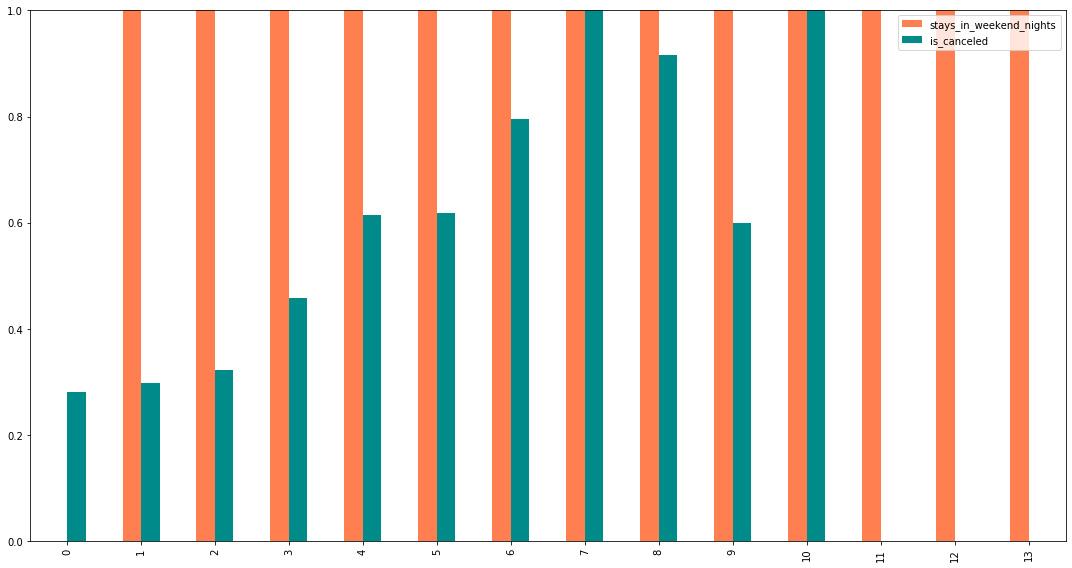

In [58]:
stays_hotel[stays_hotel['hotel']=='City Hotel'].plot(kind='bar',figsize=(15,8),colors=['coral','darkcyan'])
plt.ylim(0,1)
plt.tight_layout()
plt.show()

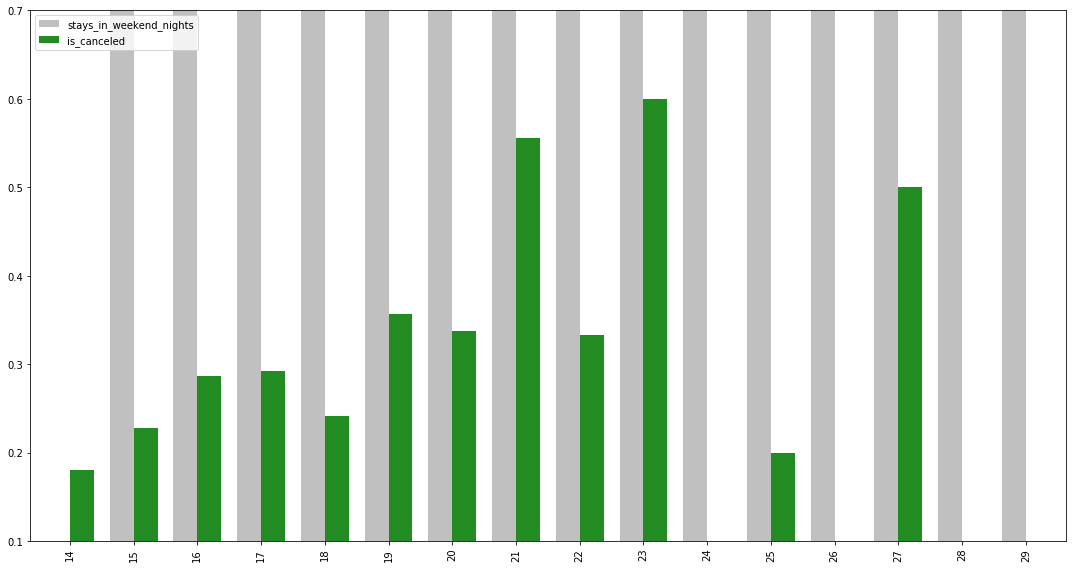

In [59]:
stays_hotel[stays_hotel['hotel']=='Resort Hotel'].plot(kind='bar',figsize=(15,8),colors=['silver','forestgreen'],width=0.75)
plt.ylim(0.1,0.7)
plt.tight_layout()
plt.show()

In [60]:
stays_hotel_bin = df[['stays_in_weekend_nights_bin','is_canceled','hotel']].groupby(['hotel','stays_in_weekend_nights_bin'],as_index=False).mean()

In [61]:
stays_hotel_bin

hotel stays_in_weekend_nights_bin  is_canceled
0    City Hotel             (-0.019, 6.333]     0.299998
1    City Hotel             (6.333, 12.667]     0.891892
2    City Hotel              (12.667, 19.0]     0.000000
3  Resort Hotel             (-0.019, 6.333]     0.234617
4  Resort Hotel             (6.333, 12.667]     0.350000
5  Resort Hotel              (12.667, 19.0]     0.166667

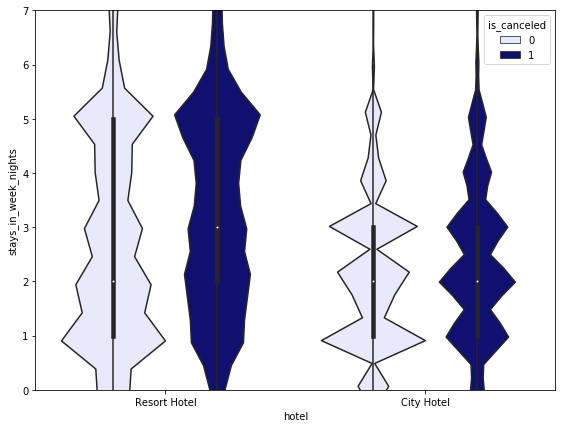

In [62]:
plt.figure(figsize=(8,6))
sns.violinplot(df['hotel'],df['stays_in_week_nights'],hue=df['is_canceled'],color='navy')
plt.tight_layout()
plt.ylim(0,7)
plt.show()

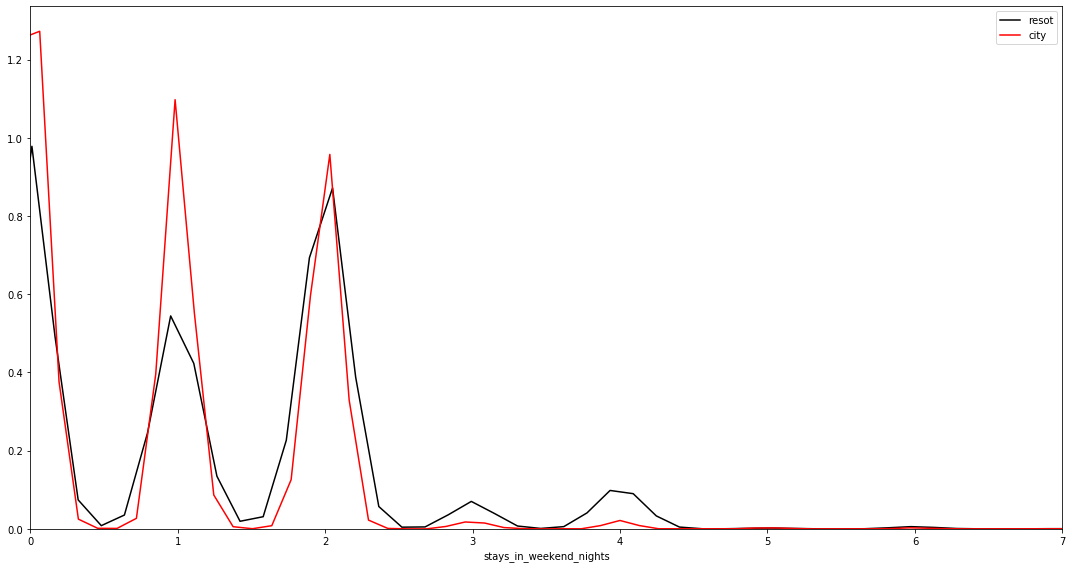

In [63]:
plt.figure(figsize=(15,8))
sns.distplot((df[df.hotel=='Resort Hotel'])['stays_in_weekend_nights'],hist=False, color = 'black',label='resot')
sns.distplot((df[df.hotel=='City Hotel'])['stays_in_weekend_nights'],hist=False,color = 'red',label='city')
plt.xlim(0,7)
plt.tight_layout()
plt.show()

In [64]:
stays_hotel_bin

hotel stays_in_weekend_nights_bin  is_canceled
0    City Hotel             (-0.019, 6.333]     0.299998
1    City Hotel             (6.333, 12.667]     0.891892
2    City Hotel              (12.667, 19.0]     0.000000
3  Resort Hotel             (-0.019, 6.333]     0.234617
4  Resort Hotel             (6.333, 12.667]     0.350000
5  Resort Hotel              (12.667, 19.0]     0.166667

In [65]:
labels_3 = ['city', 'resort']
lowstay_means = [0.3,0.23]
midstay_means = [0.89,0.35]
histay_means = [0,0.17]

plt.figure(figsize=(15,8))

width = 0.55
plt.bar(labels_3, lowstay_means, width,  label='short stay',color='skyblue')
plt.bar(labels_3, midstay_means, width, bottom=lowstay_means,label='medium stay',color='aqua')
plt.bar(labels_3, histay_means, width, bottom=midstay_means,label='long stay')

plt.legend()
plt.tight_layout()

plt.show()

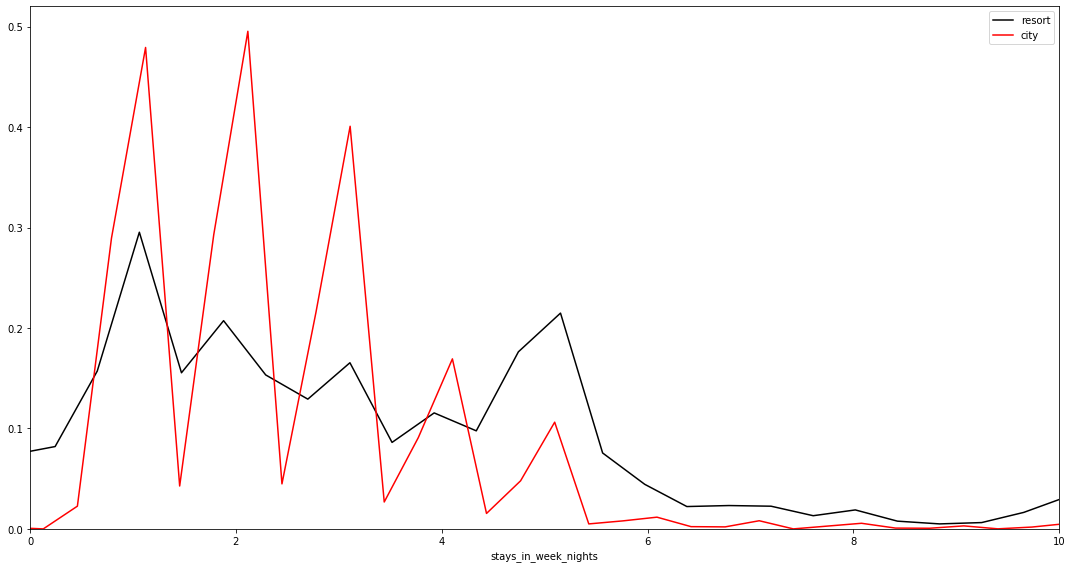

In [66]:
plt.figure(figsize=(15,8))
sns.distplot((df[df.hotel=='Resort Hotel'])['stays_in_week_nights'],hist=False, color = 'k',label='resort')
sns.distplot((df[df.hotel=='City Hotel'])['stays_in_week_nights'],hist=False,color = 'r',label='city')
plt.xlim(0,10)
plt.tight_layout()
plt.show()

In [67]:
df.customer_type.value_counts()

Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: customer_type, dtype: int64

In [68]:
plt.figure(figsize=(8,8))
plt.pie(x=[71986,11727,3139,544],labels=['Transient','Transient-Party','Contract','Group'],colors=['forestgreen','silver','indigo','orange'])
plt.show()

In [69]:
adult_cancel = df[['adults','is_canceled']].groupby('adults',as_index=False).mean()

In [70]:
adult_cancel

adults  is_canceled
0        0     0.251948
1        1     0.194449
2        2     0.289331
3        3     0.341702
4        4     0.233333
5        5     1.000000
6        6     1.000000
7       10     1.000000
8       20     1.000000
9       26     1.000000
10      27     1.000000
11      40     1.000000
12      50     1.000000
13      55     1.000000

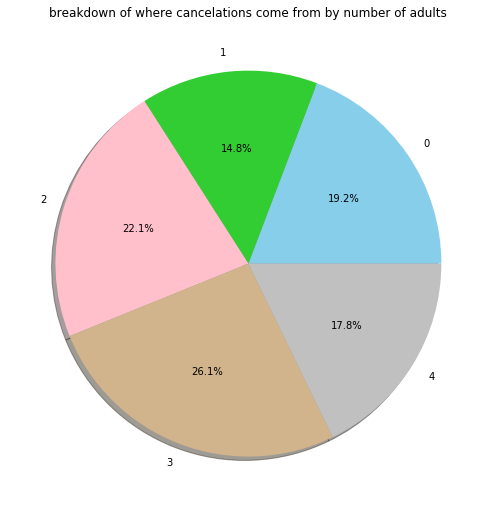

In [71]:
plt.figure(figsize=(12,7))
plt.pie(x=[0.251948,0.194449,0.289331,0.341702,0.2333333],labels=[0,1,2,3,4],colors=['skyblue','limegreen','pink','tan','silver'],shadow=True,autopct='%1.1f%%')
plt.tight_layout()
plt.title('breakdown of where cancelations come from by number of adults')
plt.show()

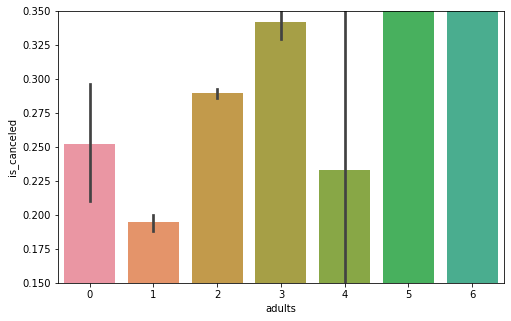

In [72]:
plt.figure(figsize=(8,5))
sns.barplot(df['adults'],df['is_canceled'])
plt.xlim(-0.5,6.5)
plt.ylim(0.15,0.35)
plt.show()

In [73]:
plt.figure(figsize=(8,8))
sns.relplot('adults','is_canceled',data=df,hue='customer_type')
plt.show()

<Figure size 576x576 with 0 Axes>

In [74]:
adult_cancel_market = (df[['adults','is_canceled','market_segment']].groupby(['market_segment','adults'],as_index=False).mean())

In [75]:
adult_cancel_market_three = adult_cancel_market[adult_cancel_market.adults<4]

In [76]:
adult_cancel_market_three

market_segment  adults  is_canceled
0        Aviation       0     0.000000
1        Aviation       1     0.201794
2        Aviation       2     0.000000
3   Complementary       0     0.285714
4   Complementary       1     0.105105
5   Complementary       2     0.139535
6   Complementary       3     0.111111
8       Corporate       0     0.083333
9       Corporate       1     0.100417
10      Corporate       2     0.202233
11      Corporate       3     0.236842
12         Direct       0     0.132075
13         Direct       1     0.136303
14         Direct       2     0.149021
15         Direct       3     0.142235
25         Groups       0     0.150000
26         Groups       1     0.201860
27         Groups       2     0.325128
28         Groups       3     0.071006
29  Offline TA/TO       0     0.189189
30  Offline TA/TO       1     0.153965
31  Offline TA/TO       2     0.145778
32  Offline TA/TO       3     0.162757
35      Online TA       0     0.302419
36      Online TA       1     0.290034
37      Online TA       2     0.356684
38      Online TA       3     0.413159
40      Undefined       2     1.000000
41      Undefined       3     1.000000

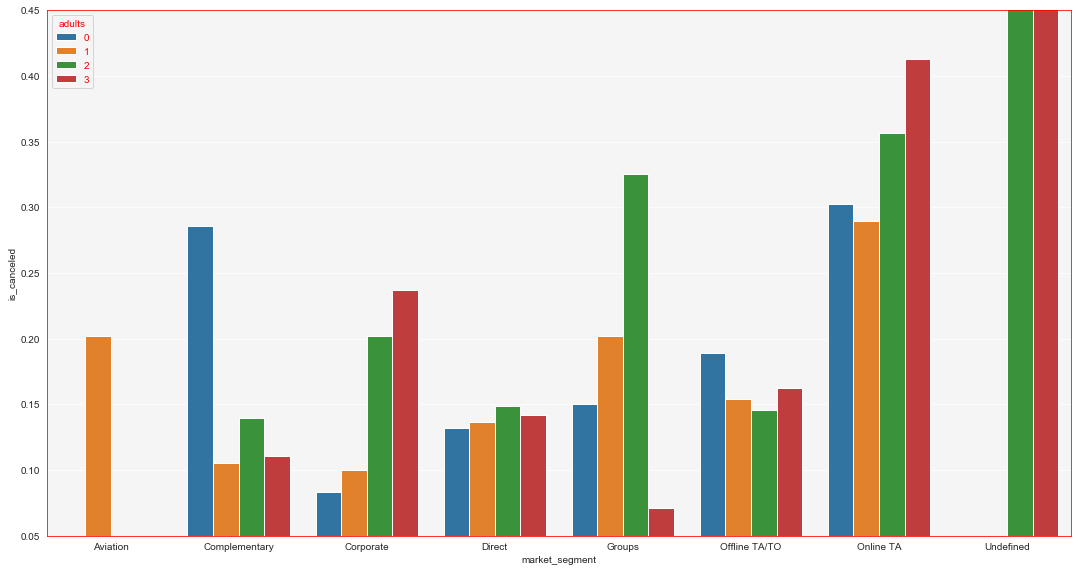

In [77]:
with sns.plotting_context("poster") and sns.axes_style('darkgrid',
                        {'axes.facecolor': 'whitesmoke','axes.edgecolor': 'red','text.color':'red'}): 
    plt.figure(figsize=(15,8))
    sns.barplot('market_segment','is_canceled',hue='adults',data=adult_cancel_market_three)
    plt.tight_layout()
    plt.ylim(0.05,0.45)
    plt.show()

## EDA - second run - not more - just a different structure so may have repeats

In [163]:
df.is_canceled.value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

In [78]:
q_lst = []

In [79]:
with sns.axes_style('darkgrid') and sns.plotting_context('paper'):

    plt.figure(figsize=(15,8))

    sns.catplot(x='hotel',y='lead_time',hue='is_canceled',data = df,palette='Blues')
    plt.legend(loc='best')
    plt.ylim(350,600)

    plt.show()

<Figure size 1080x576 with 0 Axes>

In [162]:
with sns.axes_style('darkgrid') and sns.plotting_context('paper'):

    plt.figure(figsize=(15,8))

    sns.boxenplot(x='hotel',y='lead_time',hue='is_canceled',data = df,palette='PuBu')
    plt.legend(loc='best')
    plt.ylim(0,350)

    plt.show()

In [81]:
q_lst.append('type,lead_time,cancel')

In [82]:
df[df.is_canceled==True].hotel.value_counts()

City Hotel      16049
Resort Hotel     7976
Name: hotel, dtype: int64

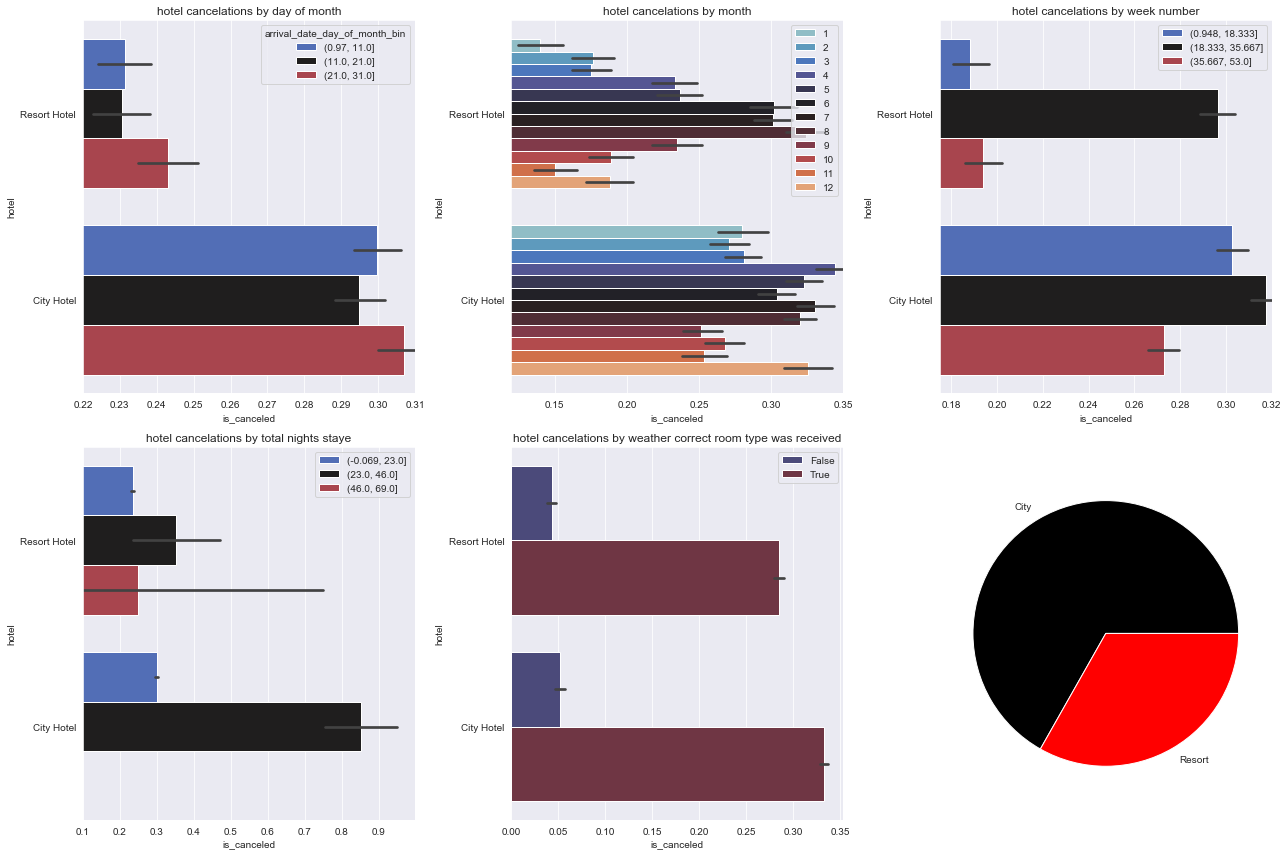

In [166]:
with sns.plotting_context("poster") and sns.axes_style("darkgrid"):    

    plt.figure(figsize=(18,12))

    plt.subplot(2,3,1)
    sns.barplot(df['is_canceled'],df['hotel'],hue=df['arrival_date_day_of_month_bin'],palette='icefire')
    plt.tight_layout()
    plt.xlim(0.22,0.31)
    plt.title('hotel cancelations by day of month')

    plt.subplot(2,3,2)
    sns.barplot(df['is_canceled'],df['hotel'],hue=df['arrival_date_month'],palette='icefire',)
    plt.tight_layout()
    plt.legend(loc='best')
    plt.xlim(0.12,0.35)
    plt.title('hotel cancelations by month')

    
    plt.subplot(2,3,3)
    sns.barplot(df['is_canceled'],df['hotel'],hue=df['arrival_date_week_number_bin'],palette='icefire',)
    plt.tight_layout()
    plt.legend(loc='best')
    plt.xlim(0.175,0.32)
    plt.title('hotel cancelations by week number')

    plt.subplot(2,3,4)
    sns.barplot(df['is_canceled'],df['hotel'],hue=df['total_nights_bin'],palette='icefire',)
    plt.tight_layout()
    plt.legend(loc='best')
    plt.xlim(0.1,)
    plt.title('hotel cancelations by total nights staye')
    
    plt.subplot(2,3,5)
    sns.barplot(df['is_canceled'],df['hotel'],hue=df['got_correct_room'],palette='icefire',)
    plt.tight_layout()
    plt.legend(loc='best')
    plt.title('hotel cancelations by weather correct room type was received')
    
    plt.subplot(2,3,6)
    plt.pie(x=[16049,7976],labels=['City','Resort'],colors=['k','r'])
    plt.tight_layout()

    plt.show()

In [84]:
top_ten_country_cancel = list(df[df.is_canceled==True].country.value_counts()[0:10].keys())

In [85]:
df_country_cancel = df[df.country.isin(top_ten_country_cancel)]

In [86]:
df_country_cancel = df_country_cancel[df_country_cancel.adults<6]

In [87]:
df_country_cancel.country.value_counts()

PRT    27891
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
USA     1875
Name: country, dtype: int64

In [88]:
list(df_country_cancel.country.value_counts().values)

[27891, 10433, 8837, 7252, 5387, 3066, 3016, 2081, 1995, 1875]

In [89]:
list(df[df.is_canceled==True].country.value_counts()[0:10].keys())

['PRT', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU', 'BRA', 'IRL', 'USA', 'BEL']

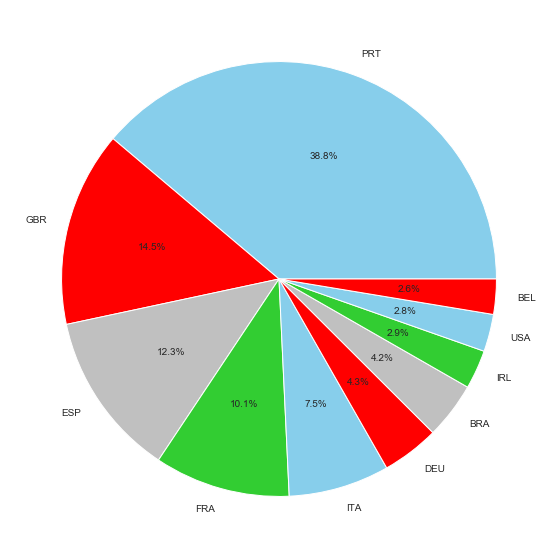

In [90]:
with sns.plotting_context("poster") and sns.axes_style("darkgrid"):    
    
    plt.figure(figsize=(15,10))
    plt.pie(x=list(df_country_cancel.country.value_counts().values),
            labels=list(df[df.is_canceled==True].country.value_counts()[0:10].keys()),
           colors=['skyblue','r','silver','limegreen'],
            autopct='%1.1f%%',
           shadow=False)
    plt.show()

In [170]:
with sns.plotting_context("poster") and sns.axes_style("darkgrid"):    

    plt.figure(figsize=(28,14))

    plt.subplot(2,3,1)
    sns.barplot(df_country_cancel['country'],df_country_cancel['is_canceled'],hue=df_country_cancel['hotel'],palette='magma_r')
    plt.tight_layout()

    plt.subplot(2,3,2)
    sns.barplot(df_country_cancel['country'],df_country_cancel['is_canceled'],hue=df_country_cancel['adults_bin'],palette='magma_r',)
    plt.tight_layout()
    plt.title('cancelations by number of adults')
    plt.legend(loc='best')
    
    plt.subplot(2,3,3)
    sns.barplot(df_country_cancel['country'],df_country_cancel['is_canceled'],hue=df_country_cancel['customer_type'],palette='magma_r',)
    plt.tight_layout()
    plt.legend(loc='best')
    
    plt.subplot(2,3,4)
    sns.barplot(df_country_cancel['country'],df_country_cancel['is_canceled'],hue=df_country_cancel['market_segment'],palette='magma_r',)
    plt.tight_layout()
    plt.legend(loc='best')
    
    plt.subplot(2,3,5)
    sns.barplot(df_country_cancel['country'],df_country_cancel['is_canceled'],hue=df_country_cancel['total_nights_bin'],palette='magma_r',)
    plt.tight_layout()
    plt.title('cancelations by total nights bin')
    plt.legend(loc='best')
    
    plt.subplot(2,3,6)
    sns.barplot(df_country_cancel['country'],df_country_cancel['is_canceled'],hue=df_country_cancel['got_correct_room'],palette='magma_r',)
    plt.tight_layout()
    plt.title('cancelations by whether or not correct room was reserved')
    plt.legend(loc='best')

    plt.show()

In [92]:
# how big are parties that cancel (hue = hotel type, customer type, market segment, distribution channel, got correct room)?barplot

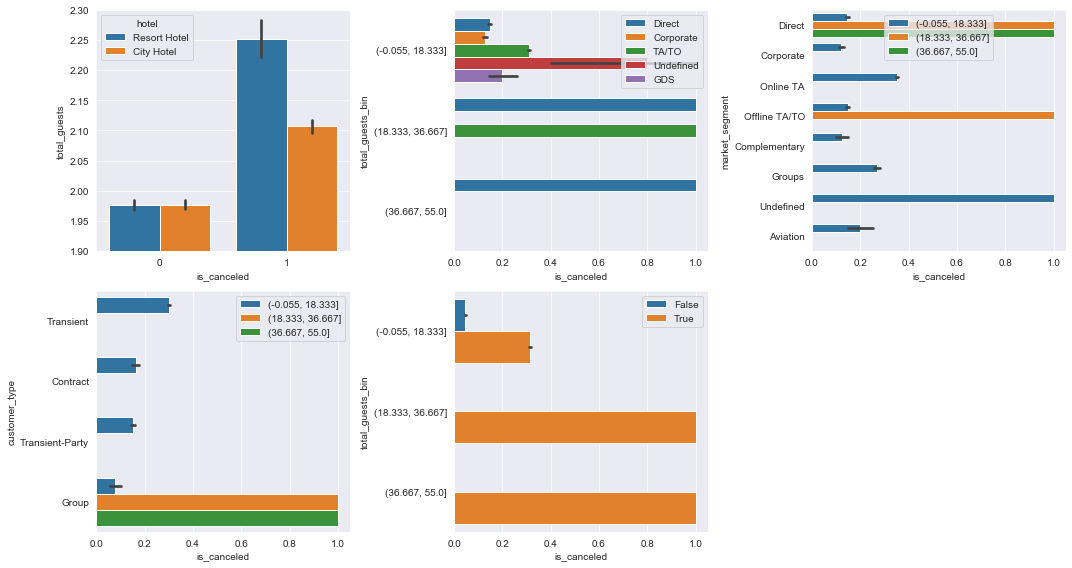

In [93]:
with sns.plotting_context("poster") and sns.axes_style("darkgrid"):   
    
    plt.figure(figsize=(15,8))

    plt.subplot(2,3,1)
    sns.barplot(df['is_canceled'],df['total_guests'],hue=df['hotel'])
    plt.ylim(1.9,2.3)
    
    plt.subplot(2,3,2)
    sns.barplot(df['is_canceled'],df['total_guests_bin'],hue=df['distribution_channel'])
    plt.legend(loc='best')
    
    plt.subplot(2,3,3)
    sns.barplot(df['is_canceled'],df['market_segment'],hue=df['total_guests_bin'])
    plt.legend(loc='best')
    plt.xlim()
    
    plt.subplot(2,3,4)
    sns.barplot(df['is_canceled'],df['customer_type'],hue=df['total_guests_bin'])
    plt.legend(loc='best')
    plt.xlim()
    
    plt.subplot(2,3,5)
    sns.barplot(df['is_canceled'],df['total_guests_bin'],hue=df['got_correct_room'])
    plt.legend(loc='best')
    plt.xlim()
    
    plt.tight_layout()
    
    plt.show()

In [94]:
# how long is the total stay of cancelations? (hue = hotel type, lead time, momnth, adults, market segment, distribution channel, got correct room)

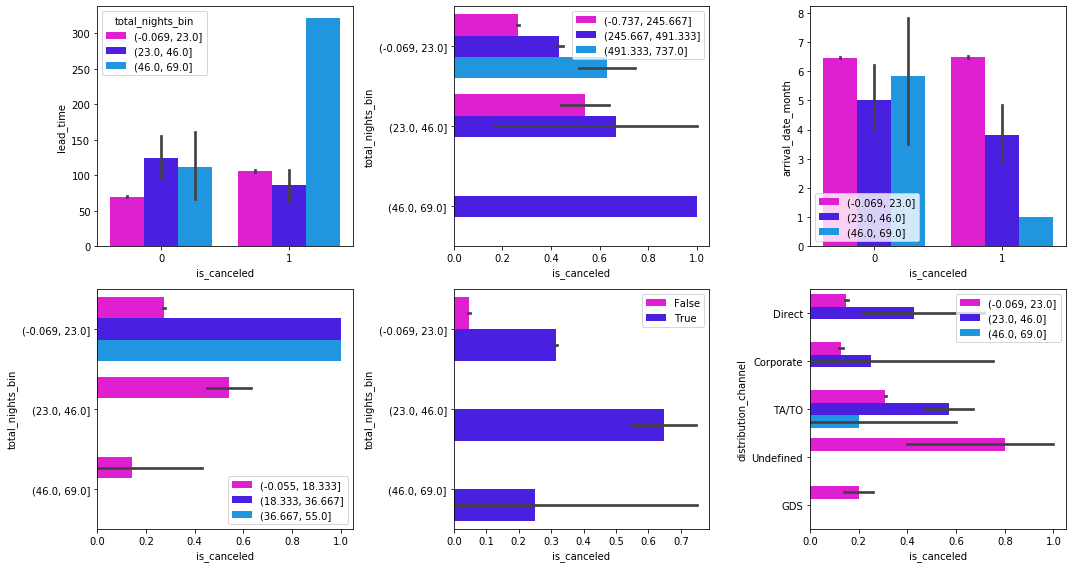

In [95]:
with sns.plotting_context("talk") and sns.axes_style("darkgrid",) and sns.color_palette(palette='hsv_r'):
    
    plt.figure(figsize=(15,8))

    plt.subplot(2,3,1)
    sns.barplot(df['is_canceled'],df['lead_time'],hue=df['total_nights_bin'])
    
    plt.subplot(2,3,2)
    sns.barplot(df['is_canceled'],df['total_nights_bin'],hue=df['lead_time_bin'])
    plt.legend(loc='best')
    
    plt.subplot(2,3,3)
    sns.barplot(df['is_canceled'],df['arrival_date_month'],hue=df['total_nights_bin'])
    plt.legend(loc='best')
    
    plt.subplot(2,3,4)
    sns.barplot(df['is_canceled'],df['total_nights_bin'],hue=df['adults_bin'])
    plt.legend(loc='best')
        
    plt.subplot(2,3,5)
    sns.barplot(df['is_canceled'],df['total_nights_bin'],hue=df['got_correct_room'])
    plt.legend(loc='best')
    
    plt.subplot(2,3,6)
    sns.barplot(df['is_canceled'],df['distribution_channel'],hue=df['total_nights_bin'])
    plt.legend(loc='best')
    
    plt.tight_layout()
    
    plt.show()

In [96]:
list(df['distribution_channel'].unique())

['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS']

In [97]:
df[['is_canceled','distribution_channel']].groupby('distribution_channel',as_index=False).mean().sort_values(by='is_canceled')

distribution_channel  is_canceled
0            Corporate     0.127534
1               Direct     0.148214
2                  GDS     0.198895
3                TA/TO     0.309686
4            Undefined     0.800000

In [98]:
plt.figure(figsize=(15,6))

x=['Corporate', 'Direct', 'GDC', 'TA/TO', 'Undefined']
y=[0.13,0.15,0.2,0.31,0.80]
plt.subplot(1,2,1)
plt.plot(x, y, color="r", alpha=0.6) 
plt.fill_between( x, y, color="k", alpha=0.4)
plt.ylim(0,0.4)
plt.tight_layout()

plt.subplot(1,2,2)
plt.pie(x=y,labels=x,colors=(['red','m','grey','forestgreen','aqua']))

plt.show()

In [99]:
#what is the average number of adults, children, and babies (in cancelations)
#(hue = hotel type, month, week number, countey, market segement, repeated guest, deposit type, total special requests, customer type, reservation status, got correct room)?

In [100]:
df[['is_canceled','adults','children','babies','total_guests']].groupby('is_canceled').mean()

adults  children    babies  total_guests
is_canceled                                            
0            1.844235  0.119724  0.012261      1.976219
1            1.959043  0.188524  0.007034      2.154601

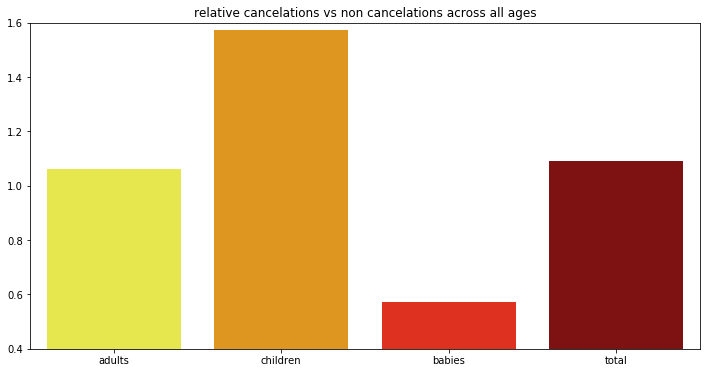

In [101]:
plt.figure(figsize=(12,6))
x1 = ['adults','children','babies','total']
y1 = [1.959043/1.844235,0.188524/0.119724,0.007034/0.012261,2.154601/1.976219]
sns.barplot(x1,y1,palette=('hot_r'))
plt.ylim(0.4,1.6)
plt.title('relative cancelations vs non cancelations across all ages')
plt.show()

In [102]:
#cancelations by distribution channel and market segment (hue = month, lead time, repeated, booking changes
# days in waiting list, got correct room)

In [103]:
with sns.plotting_context("poster") and sns.axes_style('darkgrid',{'axes.facecolor': 'grey',
    'axes.edgecolor': 'red','text.color':'red'}) and sns.color_palette(palette='hsv_r'):
    
    plt.figure(figsize=(15,8))
    
    plt.subplot(2,2,1)
    a = sns.barplot(df['market_segment'],df['is_canceled'],hue=df['arrival_date_month_bin'])
    a.set_xticklabels(a.get_xticklabels(), rotation=45)
    plt.ylim(0.05,0.4)
    
    plt.subplot(2,2,2)
    b=sns.barplot(df['market_segment'],df['is_canceled'],hue=df['lead_time_bin'])
    b.set_xticklabels(b.get_xticklabels(),rotation=45)
    plt.ylim(0,0.8)
    
    plt.subplot(2,2,3)
    c=sns.barplot(df['market_segment'],df['is_canceled'],hue=df['is_repeated_guest'])
    c.set_xticklabels(c.get_xticklabels(),rotation=45)
    plt.ylim(0,0.5)
    
    plt.subplot(2,2,4)
    d=sns.barplot(df['market_segment'],df['is_canceled'],hue=df['got_correct_room'])
    d.set_xticklabels(d.get_xticklabels(),rotation=45)
    plt.ylim(0,0.4)

    plt.show()

In [104]:
#previous cancelations implication on cancelation
#(hue = total guests, market segment, agent, is repeated guest, got correct room)

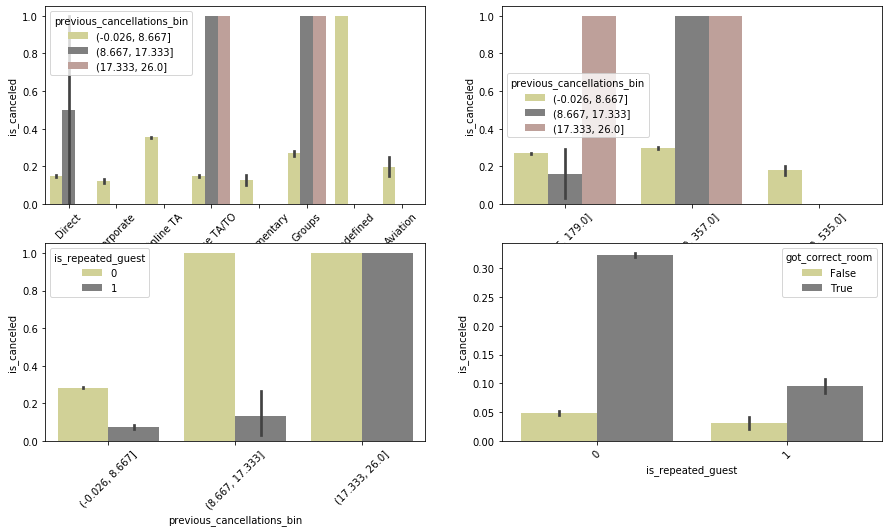

In [105]:
with sns.plotting_context("poster") and sns.axes_style('darkgrid') and sns.color_palette(palette='tab20_r'):
    
    plt.figure(figsize=(15,8))
    
    plt.subplot(2,2,1)
    a = sns.barplot(df['market_segment'],df['is_canceled'],hue=df['previous_cancellations_bin'])
    a.set_xticklabels(a.get_xticklabels(), rotation=45)
    
    plt.subplot(2,2,2)
    b=sns.barplot(df['agent_bin'],df['is_canceled'],hue=df['previous_cancellations_bin'])
    b.set_xticklabels(b.get_xticklabels(),rotation=45)
    
    plt.subplot(2,2,3)
    c=sns.barplot(df['previous_cancellations_bin'],df['is_canceled'],hue=df['is_repeated_guest'])
    c.set_xticklabels(c.get_xticklabels(),rotation=45)
    
    plt.subplot(2,2,4)
    d=sns.barplot(df['is_repeated_guest'],df['is_canceled'],hue=df['got_correct_room'])
    d.set_xticklabels(d.get_xticklabels(),rotation=45)

    plt.show()

In [106]:
# booking changes (hue = market segment, got correct room, customer type, hotel type)

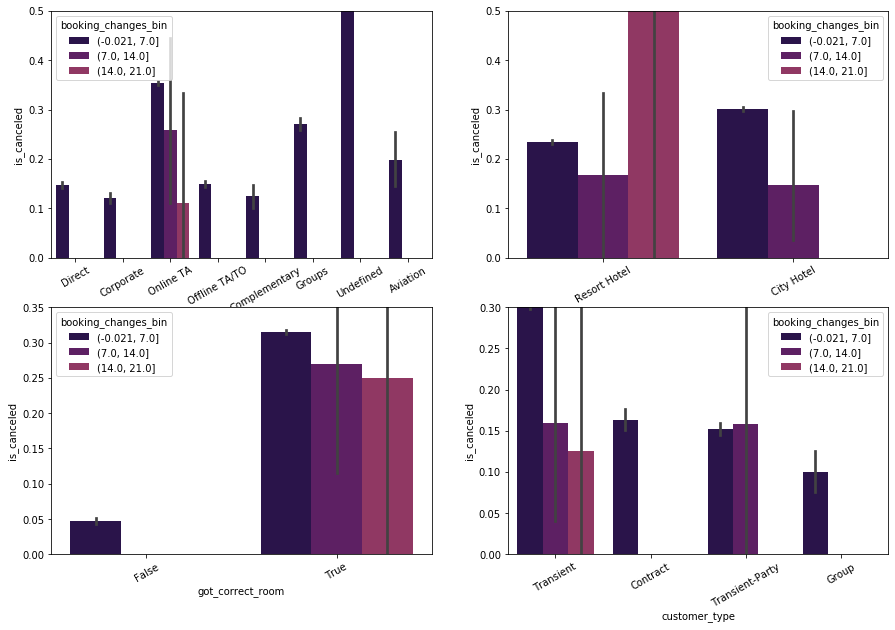

In [107]:
with sns.plotting_context("poster") and sns.axes_style('darkgrid') and sns.color_palette(palette='inferno'):
    
    plt.figure(figsize=(15,10))
    
    plt.subplot(2,2,1)
    a = sns.barplot(df['market_segment'],df['is_canceled'],hue=df['booking_changes_bin'])
    a.set_xticklabels(a.get_xticklabels(), rotation=30)
    plt.ylim(0,0.5)

    plt.subplot(2,2,2)
    b=sns.barplot(df['hotel'],df['is_canceled'],hue=df['booking_changes_bin'])
    b.set_xticklabels(b.get_xticklabels(),rotation=30)
    plt.ylim(0,0.5)
    
    plt.subplot(2,2,3)
    c=sns.barplot(df['got_correct_room'],df['is_canceled'],hue=df['booking_changes_bin'])
    c.set_xticklabels(c.get_xticklabels(),rotation=30)
    plt.ylim(0,0.35)
    
    plt.subplot(2,2,4)
    d=sns.barplot(df['customer_type'],df['is_canceled'],hue=df['booking_changes_bin'])
    d.set_xticklabels(d.get_xticklabels(),rotation=30)
    plt.ylim(0,0.3)

    plt.show()

In [108]:
# days in waiting list (hue = customer type, month, total guests, hotel type, country, market segment)

In [109]:
with sns.plotting_context("poster") and sns.axes_style('darkgrid') and sns.color_palette(palette='plasma'):
    
    plt.figure(figsize=(15,10))
    
    plt.subplot(2,2,1)
    a = sns.barplot(df['customer_type'],df['is_canceled'],hue=df['days_in_waiting_list_bin'])
    a.set_xticklabels(a.get_xticklabels(), rotation=30)

    plt.subplot(2,2,2)
    b=sns.barplot(df['hotel'],df['is_canceled'],hue=df['days_in_waiting_list_bin'])
    b.set_xticklabels(b.get_xticklabels(),rotation=30)
    
    plt.subplot(2,2,3)
    c=sns.barplot(df['arrival_date_month_bin'],df['is_canceled'],hue=df['days_in_waiting_list_bin'])
    c.set_xticklabels(c.get_xticklabels(),rotation=30)
    
    plt.subplot(2,2,4)
    d=sns.barplot(df['total_guests_bin'],df['is_canceled'],hue=df['days_in_waiting_list_bin'])
    d.set_xticklabels(d.get_xticklabels(),rotation=30)

    plt.show()

In [110]:
#special requests (hue = customer type, month)

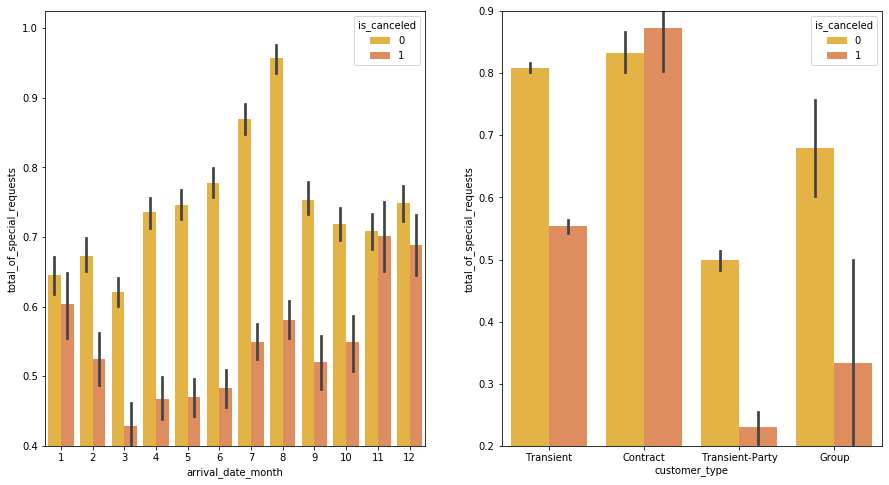

In [111]:
with sns.plotting_context("poster") and sns.axes_style('darkgrid') and sns.color_palette(palette='plasma_r'):
    
    plt.figure(figsize=(15,8))
    
    plt.subplot(1,2,1)
    sns.barplot(df['arrival_date_month'],df['total_of_special_requests'],hue=df['is_canceled'])
    plt.ylim(0.4,)
    
    plt.subplot(1,2,2)
    sns.barplot(df['customer_type'],df['total_of_special_requests'],hue=df['is_canceled'])
    plt.ylim(0.2,0.9)
    
    plt.show()

In [112]:
df[['total_of_special_requests','arrival_date_month_bin']].groupby('arrival_date_month_bin').mean()

total_of_special_requests
arrival_date_month_bin                           
(0.989, 4.667]                           0.624294
(4.667, 8.333]                           0.748838
(8.333, 12.0]                            0.701305

In [113]:
#### radar chart

import plotly.express as px
aaa = pd.DataFrame(dict(
    r=[0.624294,0.748838,0.701305],
    theta=['early','mid','late']))
fig = px.line_polar(aaa, r='r', theta='theta', line_close=True)
fig.show()

In [114]:
# got correct room (hue = market segment, customer type, country, deposit type, days waiting, hotel type, month
# week num, total guests, reserved room type)
# total guests and days 

In [117]:
with sns.plotting_context("poster") and sns.axes_style('darkgrid') and sns.color_palette(palette='gnuplot2_r'):
    
    plt.figure(figsize=(15,8))
    
    plt.subplot(2,2,1)
    sns.barplot(df['hotel'],df['is_canceled'],hue=df['got_correct_room'])
    
    plt.subplot(2,2,2)
    sns.barplot(df['customer_type'],df['is_canceled'],hue=df['got_correct_room'])
    
    plt.subplot(2,2,3)
    sns.barplot(df['reserved_room_type'],df['is_canceled'],hue=df['got_correct_room'])
    
    plt.subplot(2,2,4)
    sns.barplot(df['got_correct_room'],df['days_in_waiting_list'],hue=df['is_canceled'])
    
    plt.show()

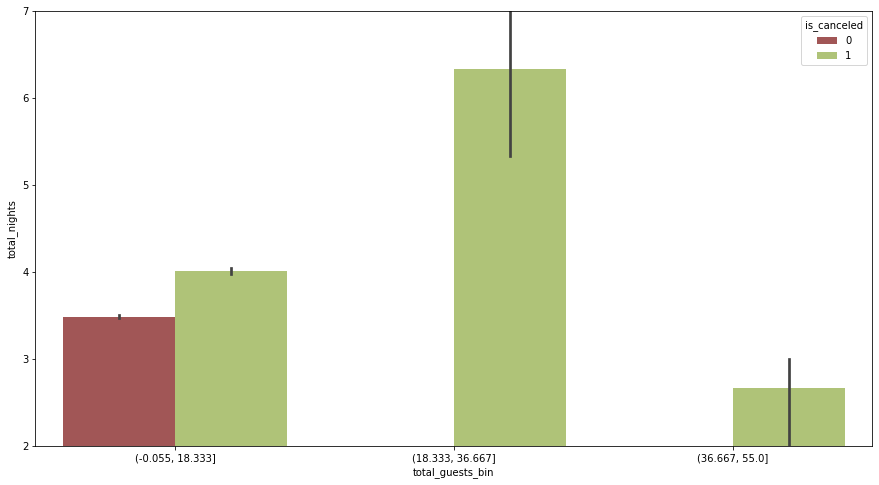

In [121]:
plt.figure(figsize=(15,8))
sns.barplot(df['total_guests_bin'],df['total_nights'],hue=df['is_canceled'],palette='tab20b_r')
plt.ylim(2,7)
plt.show()